In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
df = pd.read_csv('CartPoleData.csv')
X = df.drop(columns='ACT', axis=1).values
y = df.loc[:,'ACT']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CP      500 non-null    float64
 1   CV      500 non-null    float64
 2   PA      500 non-null    float64
 3   PAV     500 non-null    float64
 4   ACT     500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [3]:
X_tra, X_test, y_tra, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
dt = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=0, 
    max_depth=4
) 

In [5]:
model = dt.fit(X_tra, y_tra)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(f'test accuracy={acc}')

test accuracy=0.87


In [6]:
features = ['Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Angular Velocity']
r = export_text(model, feature_names=features, decimals=5) 
print(r)

|--- Cart Velocity <= 0.01293
|   |--- Cart Velocity <= -0.17716
|   |   |--- class: 1
|   |--- Cart Velocity >  -0.17716
|   |   |--- Cart Velocity <= -0.08174
|   |   |   |--- Pole Angle <= 0.01631
|   |   |   |   |--- class: 0
|   |   |   |--- Pole Angle >  0.01631
|   |   |   |   |--- class: 1
|   |   |--- Cart Velocity >  -0.08174
|   |   |   |--- Pole Angle <= -0.01049
|   |   |   |   |--- class: 0
|   |   |   |--- Pole Angle >  -0.01049
|   |   |   |   |--- class: 1
|--- Cart Velocity >  0.01293
|   |--- Pole Angular Velocity <= -0.26162
|   |   |--- class: 0
|   |--- Pole Angular Velocity >  -0.26162
|   |   |--- Pole Angle <= 0.01190
|   |   |   |--- Pole Angular Velocity <= -0.04878
|   |   |   |   |--- class: 0
|   |   |   |--- Pole Angular Velocity >  -0.04878
|   |   |   |   |--- class: 0
|   |   |--- Pole Angle >  0.01190
|   |   |   |--- Cart Velocity <= 0.01504
|   |   |   |   |--- class: 1
|   |   |   |--- Cart Velocity >  0.01504
|   |   |   |   |--- class: 0



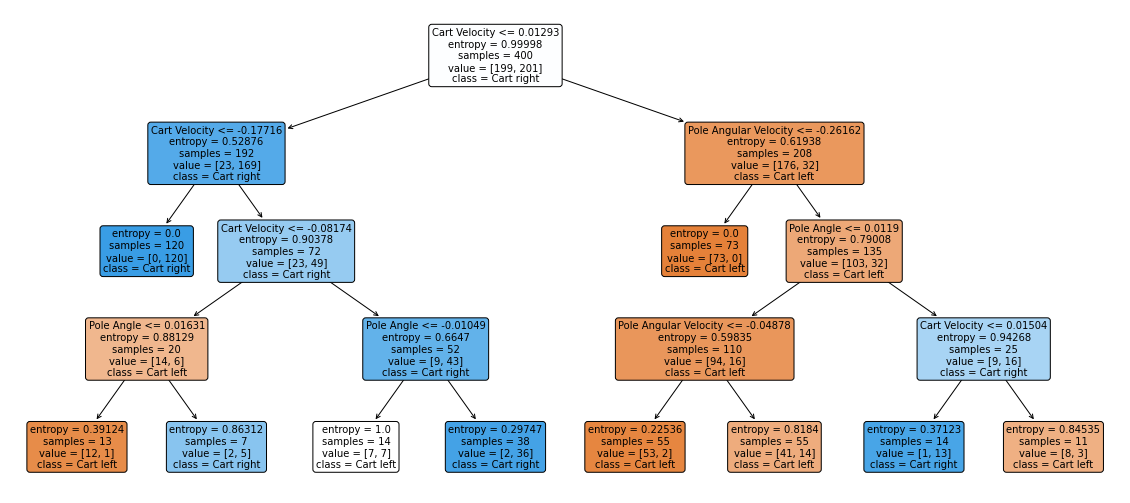

In [7]:
classes = ['Cart left', 'Cart right']
plt.figure(figsize=(20,9))
tree.plot_tree(
    model, 
    feature_names=features, 
    class_names=classes, 
    rounded=True, 
    fontsize=10, 
    precision=5, 
    filled=True
)
plt.savefig('CartPoleTree.png')
plt.show()

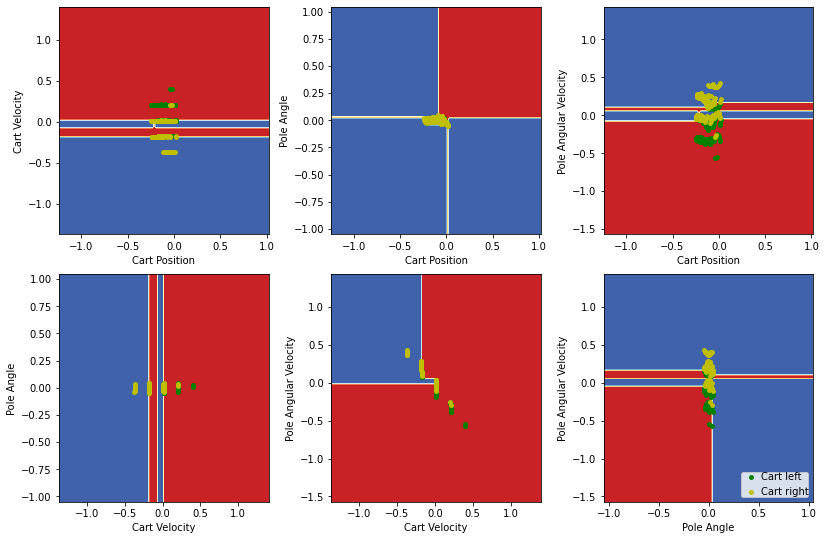

In [8]:
# Parameters
n_classes = 2
plot_colors = "gy"
# plot_step = 0.02
plt.figure(figsize=(12,8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X_ = X[:, pair]

    # Train
    clf = tree.DecisionTreeClassifier(random_state=0).fit(X_, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=features[pair[0]],
        ylabel=features[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X_[idx, 0],
            X_[idx, 1],
            c=color,
            label=classes[i],
            cmap=plt.cm.RdYlBu,
#             edgecolor="black",
            s=15,
        )

# plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

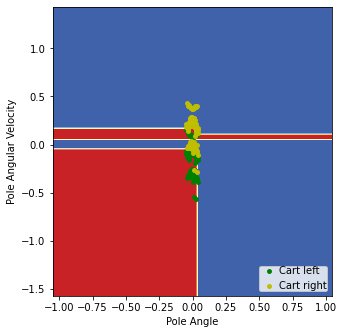

In [9]:
# Parameters
n_classes = 2
plot_colors = "gy"
# plot_step = 0.02
plt.figure(figsize=(5,5))
for pairidx, pair in enumerate([[2, 3]]):
    # We only take the two corresponding features
    X_ = X[:, pair]

    # Train
    clf = tree.DecisionTreeClassifier(random_state=0).fit(X_, y)

    # Plot the decision boundary
    ax = plt.subplot(1, 1, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=features[pair[0]],
        ylabel=features[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X_[idx, 0],
            X_[idx, 1],
            c=color,
            label=classes[i],
            cmap=plt.cm.RdYlBu,
#             edgecolor="black",
            s=15,
        )

# plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")